In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
saws_df = wrangle.wrangle_saws()

In [3]:
saws_df['year_month'] = '20' + saws_df['year_month']
saws_df['year_month'] = pd.to_datetime(saws_df['year_month'])

In [4]:
saws_df.groupby([saws_df['year_month'].dt.year.rename('y'), saws_df['year_month'].dt.month.rename('m')]).mean()

zipcode  gallons_consumed
y    m                            
2017 1     78229       3462.358907
     2     78229       3214.546263
     3     78229       3158.374053
     4     78229       3350.766546
     5     78229       4090.987158
     6     78229       4284.356602
     7     78229       4708.297662
     8     78229       6075.917682
     9     78229       4393.238722
     10    78229       4505.319394
     11    78229       3785.293052
     12    78229       3882.099440
2018 1     78229       3109.850181
     2     78229       3434.769839
     3     78229       2978.550543
     4     78229       3572.707277
     5     78229       4098.624300
     6     78229       4634.152453
     7     78229       5220.660191
     8     78229       5223.128087
     9     78229       5296.035891
     10    78229       3797.613434
     11    78229       3012.053013
     12    78229       3150.496213
2019 1     78229       3076.592032
     2     78229       3141.866645
     3     78229       2838.873230
     4     78229       3409.140599
     5     78229       3470.486335
     6     78229       3538.709582
     7     78229       3614.575568
     8     78229       4779.721765
     9     78229       6276.673033
     10    78229       5336.688179
     11    78229       4148.872242
     12    78229       3183.241686
2020 1     78229       3416.777412
     2     78229       3299.523214
     3     78229       3045.305565
     4     78229       3343.116562
     5     78229       3754.985841
     6     78229       4471.821205
     7     78229       4534.626276
     8     78229       6039.954560
     9     78229       5286.431347
     10    78229       4633.161673
     11    78229       4753.123477
     12    78229       4773.817912

In [5]:
saws_df.gallons_consumed.groupby(saws_df['year_month'].dt.month).mean()

year_month
1     3266.394633
2     3272.676490
3     3005.275848
4     3418.932746
5     3853.770909
6     4232.259960
7     4519.539924
8     5529.680524
9     5313.094748
10    4568.195670
11    3924.835446
12    3747.413813
Name: gallons_consumed, dtype: float64

In [6]:
saws_df.year_month.unique()

array(['2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000', '2019-04-01

In [7]:
sound_df = wrangle.wrangle_sound()
sound_df = sound_df.set_index('DateTime')
sound_df = sound_df.sort_index()

In [8]:
sound_df

,NoiseLevel_db,noise_level
DateTime,,
2021-04-20 00:00:43,63,Moderate
2021-04-20 00:07:45,58,Moderate
2021-04-20 00:08:26,58,Moderate
2021-04-20 00:10:43,59,Moderate
2021-04-20 00:17:46,55,Moderate
...,...,...
2021-07-08 23:56:14,66,Moderate
2021-07-08 23:56:14,65,Moderate
2021-07-08 23:59:13,66,Moderate


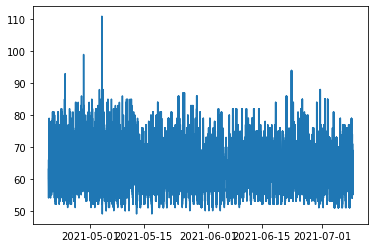

In [9]:
plt.plot(sound_df.index, sound_df.NoiseLevel_db)

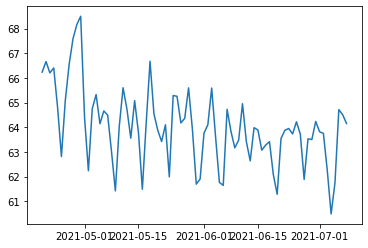

In [10]:
plt.plot(sound_df.resample('D').mean())

[Text(0.5, 1.0, 'Average Noise Level by Hour'),
 Text(0.5, 0, 'Hour'),
 Text(0, 0.5, 'Decibels')]

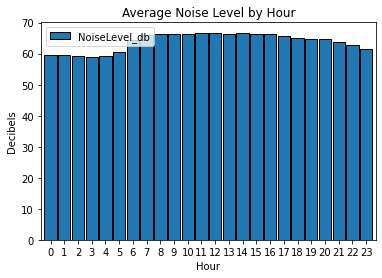

In [11]:
woosh = sound_df.resample('H').mean()
ax = woosh.groupby(woosh.index.hour).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Noise Level by Hour', xlabel='Hour', ylabel='Decibels')

[Text(0.5, 1.0, 'Average Noise Level by Day of Week'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'Decibels')]

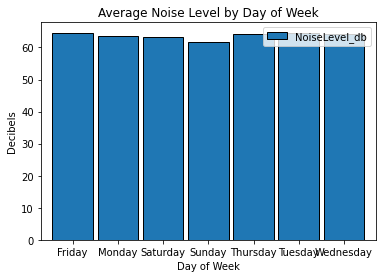

In [12]:
ax = sound_df.groupby(sound_df.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Noise Level by Day of Week', xlabel='Day of Week', ylabel='Decibels')

In [13]:
flood_df = wrangle.clean_flood()
flood_df = flood_df.set_index('datetime')

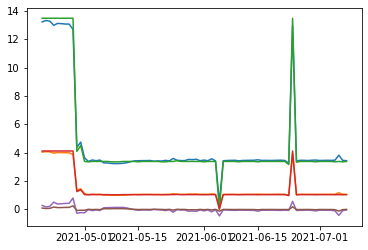

In [14]:
plt.plot(flood_df.resample('D').mean())

In [15]:
flood_df

,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
datetime,,,,,,
2021-05-20 00:11:55,13.188976,4.0200,13.500656,4.115,0.311680,0.0950
2021-05-20 00:26:55,13.254593,4.0400,13.500656,4.115,0.246063,0.0750
2021-05-20 00:41:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
2021-05-20 00:56:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
2021-05-20 01:11:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
...,...,...,...,...,...,...
2021-07-08 23:35:00,0.216700,0.0660,0.000000,0.000,-0.216700,-0.0660
2021-07-08 23:40:00,0.216700,0.0660,0.000000,0.000,-0.216700,-0.0660
2021-07-08 23:45:00,0.233300,0.0711,0.000000,0.000,-0.233300,-0.0711


In [16]:
air_df = wrangle.clean_air()
air_df.datetime = pd.to_datetime(air_df.datetime)
air_df = air_df.set_index('datetime')
air_df = air_df.sort_index()
air1_df = air_df[(air_df['Pm1_0'] < 500) & (air_df['Pm1_0'] > -50)]

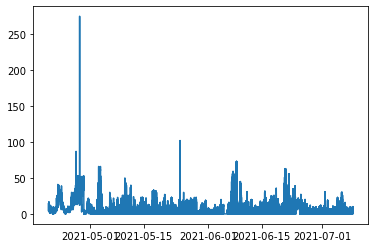

In [17]:
plt.plot(air1_df.index, air1_df.Pm1_0)

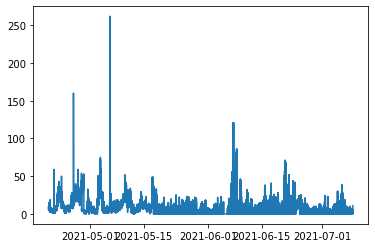

In [18]:
air25_df = air_df[(air_df['Pm2_5'] < 500) & (air_df['Pm2_5'] > -50)]
plt.plot(air25_df.index, air25_df.Pm2_5)

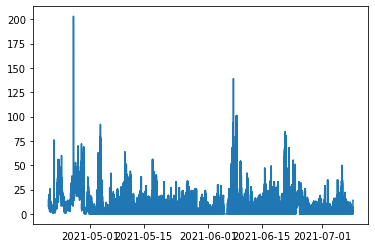

In [19]:
air10_df = air_df[(air_df['Pm10'] < 500) & (air_df['Pm10'] > -50)]
plt.plot(air10_df.index, air10_df.Pm10)

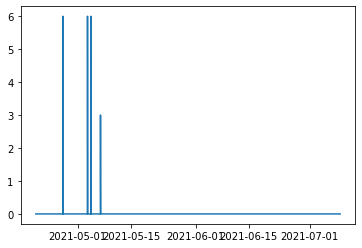

In [20]:
plt.plot(air_df.index, air_df.SO2)

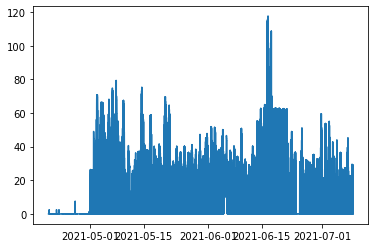

In [21]:
plt.plot(air_df.index, air_df.O3)

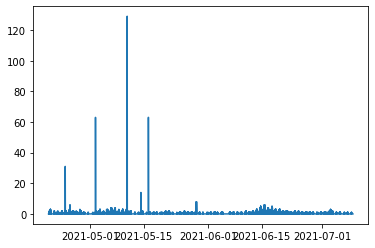

In [22]:
plt.plot(air_df.index, air_df.CO)

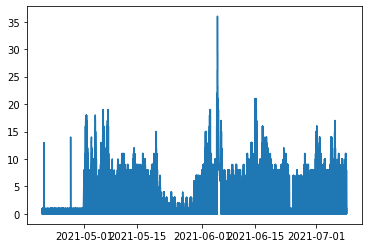

In [23]:
plt.plot(air_df.index, air_df.NO2)

In [24]:
weather_df = wrangle.wrangle_weather()

In [25]:
weather_df.dewpoint_celsius.isna().sum()

0

In [26]:
weather_df['wind'] = weather_df['wind'].str.extract('(\d+)', expand=False)
weather_df['visibility'] = weather_df['visibility'].str.extract('(\d+)', expand=False)
weather_df['wind'] = weather_df['wind'].fillna(0)
weather_df['wind'] = weather_df['wind'].apply(lambda x: int(x))
weather_df['visibility'] = weather_df['visibility'].apply(lambda x: int(x))

In [27]:
weather_df.describe()

,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,wind,visibility
count,125956.000000,125956.000000,125956.000000,125956.000000,125956.000000,125956.000000,125956.000000,125956.000000
mean,26.874559,80.357244,72.845417,17.168157,57.171157,802.154355,9.152966,9.503549
std,5.460621,9.810163,17.901945,8.587488,27.271507,374.900004,4.602754,1.556126
min,-307.000000,-521.000000,14.000000,-307.111201,-520.800163,0.000000,0.000000,0.000000
25%,24.000000,74.000000,59.940000,17.253116,63.055609,973.000000,6.000000,10.000000
50%,26.000000,78.530000,78.000000,20.932030,69.677654,976.000000,9.000000,10.000000
75%,30.000000,86.000000,88.000000,22.620397,72.716714,979.000000,12.000000,10.000000
max,180.000000,355.000000,121.000000,176.094879,348.970782,5076.000000,30.000000,10.000000


In [28]:
flood_df.describe()

,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
count,27554.000000,27554.000000,27554.000000,27554.000000,27554.000000,27554.000000
mean,3.762779,1.146894,3.703689,1.128885,-0.059089,-0.018010
std,5.675450,1.729878,6.023806,1.836056,0.486085,0.148158
min,0.000000,0.000000,0.000000,0.000000,-6.516700,-1.986300
25%,0.225000,0.068600,0.000000,0.000000,-0.266700,-0.081300
50%,0.275000,0.083800,0.000000,0.000000,-0.216700,-0.066000
75%,12.860892,3.920000,13.500656,4.115000,0.344488,0.105000
max,13.484252,4.110000,13.500656,4.115000,13.500656,4.115000


In [29]:
sound_df.describe()

,NoiseLevel_db
count,106287.000000
mean,63.731388
std,6.253899
min,49.000000
25%,59.000000
50%,64.000000
75%,68.000000
max,111.000000


In [30]:
air_df.describe()

,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,hour,weekday,CO_24hr,Pm_25_24hr,Pm_10_24hr
count,106287.000000,106287.000000,106287.000000,106287.000000,106287.000000,106287.000000,106287.000000,106287.000000,106287.00000,106287.000000,106287.000000,106287.000000
mean,21.380564,13.072906,12.010302,0.000292,6.262544,0.179702,1.581764,11.369415,2.95737,0.179702,13.072906,12.010302
std,897.298097,165.756299,86.612107,0.035638,15.068418,1.102288,3.211028,6.863005,2.00543,0.178548,16.503164,8.523272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.00000,0.069444,5.991898,6.766204
50%,6.000000,7.000000,9.000000,0.000000,0.000000,0.000000,0.000000,11.000000,3.00000,0.119792,8.115741,9.270255
75%,12.000000,13.000000,16.000000,0.000000,0.000000,0.000000,1.000000,17.000000,5.00000,0.213889,13.141204,14.222801
max,65288.000000,16387.000000,16180.000000,6.000000,117.530000,129.000000,36.000000,23.000000,6.00000,0.833333,96.275942,51.232295


In [31]:
weather_day_df = weather_df.resample('D', on='datetime').mean()
flood_day_df = flood_df.resample('D').mean()
sound_day_df = sound_df.resample('D').mean()
air_day_df = air_df.resample('D').mean().drop(columns = ['hour', 'weekday', 'CO_24hr', 'Pm_25_24hr', 'Pm_10_24hr', 'SO2', 'O3', 'NO2'])

In [32]:
air_day_df

,Pm1_0,Pm2_5,Pm10,CO
datetime,,,,
2021-04-20,5.193732,8.022792,7.324786,0.299145
2021-04-21,2.968750,3.616477,4.460227,0.144886
2021-04-22,16.866477,18.247159,22.963068,0.056818
2021-04-23,18.123563,19.209770,23.916667,0.166667
2021-04-24,3.804533,4.458924,51.232295,0.405099
...,...,...,...,...
2021-07-04,5.982609,6.902029,8.548986,0.069565
2021-07-05,10.007536,10.895072,13.280580,0.069565
2021-07-06,9.242319,10.684638,12.732174,0.022609


In [33]:
air2_5 = air_df.drop(air_df.columns.difference(['Pm2_5', 'AQI_pm2_5']), 1)
air10 = air_df.drop(air_df.columns.difference(['Pm10', 'AQI_pm10']), 1)
airCO = air_df.drop(air_df.columns.difference(['CO', 'AQI_CO']), 1)

In [34]:
series2_5 = air2_5.resample('D').max().rename(columns = {'AQI_pm2_5': 'most_hazardous_pm2.5_level'})['most_hazardous_pm2.5_level']
series10 = air10.resample('D').max().rename(columns = {'AQI_pm10': 'most_hazardous_pm10_level'})['most_hazardous_pm10_level']
seriesCO = airCO.resample('D').max().rename(columns = {'AQI_CO': 'most_hazardous_CO_level'})['most_hazardous_CO_level']

In [35]:
series2_5

datetime
2021-04-20                         Hazardous
2021-04-21                         Unhealthy
2021-04-22    Unhealthy for Sensitive Groups
2021-04-23    Unhealthy for Sensitive Groups
2021-04-24                          Moderate
                           ...              
2021-07-04                          Moderate
2021-07-05                          Moderate
2021-07-06    Unhealthy for Sensitive Groups
2021-07-07                              Good
2021-07-08                              Good
Freq: D, Name: most_hazardous_pm2.5_level, Length: 80, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy for Sensitive Groups' < 'Unhealthy' < 'Very Unhealthy' < 'Hazardous']

In [36]:
series10

datetime
2021-04-20        Good
2021-04-21    Moderate
2021-04-22    Moderate
2021-04-23    Moderate
2021-04-24        Good
                ...   
2021-07-04        Good
2021-07-05        Good
2021-07-06        Good
2021-07-07        Good
2021-07-08        Good
Freq: D, Name: most_hazardous_pm10_level, Length: 80, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy for Sensitive Groups' < 'Unhealthy' < 'Very Unhealthy' < 'Hazardous']

In [37]:
seriesCO

datetime
2021-04-20         Good
2021-04-21         Good
2021-04-22         Good
2021-04-23         Good
2021-04-24    Hazardous
                ...    
2021-07-04         Good
2021-07-05         Good
2021-07-06         Good
2021-07-07         Good
2021-07-08         Good
Freq: D, Name: most_hazardous_CO_level, Length: 80, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy for Sensitive Groups' < 'Unhealthy' < 'Very Unhealthy' < 'Hazardous']

In [38]:
hazards = pd.DataFrame(series2_5).join(series10).join(seriesCO)

In [39]:
hazards

,most_hazardous_pm2.5_level,most_hazardous_pm10_level,most_hazardous_CO_level
datetime,,,
2021-04-20,Hazardous,Good,Good
2021-04-21,Unhealthy,Moderate,Good
2021-04-22,Unhealthy for Sensitive Groups,Moderate,Good
2021-04-23,Unhealthy for Sensitive Groups,Moderate,Good
2021-04-24,Moderate,Good,Hazardous
...,...,...,...
2021-07-04,Moderate,Good,Good
2021-07-05,Moderate,Good,Good
2021-07-06,Unhealthy for Sensitive Groups,Good,Good


In [40]:
def full_daily_COSA_dataframe():
    sound_df = wrangle.wrangle_sound()
    sound_df = sound_df.set_index('DateTime')
    sound_df = sound_df.sort_index()
    flood_df = wrangle.clean_flood()
    flood_df = flood_df.set_index('datetime')
    weather_df = wrangle.wrangle_weather()
    air_df = wrangle.clean_air()
    air_df.datetime = pd.to_datetime(air_df.datetime)
    air_df = air_df.set_index('datetime')
    air_df = air_df.sort_index()
    weather_day_df = weather_df.resample('D', on='datetime').mean()
    flood_day_df = flood_df.resample('D').mean()
    sound_day_df = sound_df.resample('D').mean()
    air_day_df = air_df.resample('D').mean().drop(columns = ['hour', 'weekday', 'CO_24hr', 'Pm_25_24hr', 'Pm_10_24hr', 'SO2', 'O3', 'NO2'])
    air2_5 = air_df.drop(air_df.columns.difference(['Pm2_5', 'AQI_pm2_5']), 1)
    air10 = air_df.drop(air_df.columns.difference(['Pm10', 'AQI_pm10']), 1)
    airCO = air_df.drop(air_df.columns.difference(['CO', 'AQI_CO']), 1)
    series2_5 = air2_5.resample('D').max().rename(columns = {'AQI_pm2_5': 'most_hazardous_pm2.5_level'})['most_hazardous_pm2.5_level']
    series10 = air10.resample('D').max().rename(columns = {'AQI_pm10': 'most_hazardous_pm10_level'})['most_hazardous_pm10_level']
    seriesCO = airCO.resample('D').max().rename(columns = {'AQI_CO': 'most_hazardous_CO_level'})['most_hazardous_CO_level']
    hazards = pd.DataFrame(series2_5).join(series10).join(seriesCO)
    df = weather_day_df.join(air_day_df).join(hazards).join(sound_day_df).join(flood_day_df)
    df = df.round({'celsius': 2, 'farenheit': 2, 'humidity': 2, 'dewpoint_celsius': 2, 'dewpoint_farenheit': 2,
          'pressure': 2, 'NoiseLevel_db': 2, 'sensor_to_water_feet': 2, 'sensor_to_water_meters': 2,
          'sensor_to_ground_feet': 2, 'sensor_to_ground_meters': 2, 'flood_depth_feet': 2,
          'flood_depth_meters': 2})
    return df

In [41]:
df = wrangle.full_daily_COSA_dataframe()

In [42]:
df

,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,Pm1_0,Pm2_5,Pm10,CO,most_hazardous_pm2.5_level,most_hazardous_pm10_level,most_hazardous_CO_level,NoiseLevel_db,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters,AQI_CO,AQI_pm2_5,AQI_pm10
datetime,,,,,,,,,,,,,,,,,,,,,,,
2021-04-20,20.89,69.56,45.79,7.67,45.80,988.08,5.193732,8.022792,7.324786,0.299145,Hazardous,Good,Good,66.23,13.24,4.04,13.50,4.12,0.26,0.08,Good,Good,Good
2021-04-21,15.32,59.60,36.49,-0.31,31.43,985.50,2.968750,3.616477,4.460227,0.144886,Unhealthy,Moderate,Good,66.66,13.34,4.07,13.50,4.12,0.16,0.05,Good,Good,Good
2021-04-22,16.00,60.85,67.74,9.64,49.35,979.65,16.866477,18.247159,22.963068,0.056818,Unhealthy for Sensitive Groups,Moderate,Good,66.20,13.30,4.05,13.50,4.12,0.21,0.06,Good,Moderate,Good
2021-04-23,22.51,72.46,85.76,19.65,67.37,971.28,18.123563,19.209770,23.916667,0.166667,Unhealthy for Sensitive Groups,Moderate,Good,66.40,13.00,3.96,13.50,4.12,0.50,0.15,Good,Moderate,Good
2021-04-24,24.97,76.97,50.29,10.99,51.78,974.48,3.804533,4.458924,51.232295,0.405099,Moderate,Good,Hazardous,64.81,13.13,4.00,13.50,4.12,0.37,0.11,Good,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-04,27.62,81.82,77.85,19.10,61.03,813.44,5.982609,6.902029,8.548986,0.069565,Moderate,Good,Good,60.49,3.45,1.05,3.38,1.03,-0.08,-0.02,Good,Good,Good
2021-07-05,27.75,81.94,77.98,19.20,61.23,813.53,10.007536,10.895072,13.280580,0.069565,Moderate,Good,Good,61.75,3.46,1.06,3.35,1.02,-0.12,-0.04,Good,Good,Good
2021-07-06,25.34,77.71,88.19,19.22,61.21,811.91,9.242319,10.684638,12.732174,0.022609,Unhealthy for Sensitive Groups,Good,Good,64.71,3.82,1.16,3.38,1.03,-0.44,-0.13,Good,Good,Good


[Text(0.5, 1.0, 'Average PM 1.0 Level by Day of Week'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'PM 1.0 Level')]

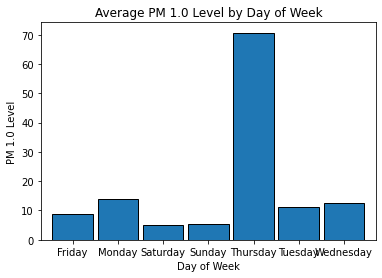

In [43]:
ax = df.Pm1_0.groupby(df.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average PM 1.0 Level by Day of Week', xlabel='Day of Week', ylabel='PM 1.0 Level')

[Text(0.5, 1.0, 'Average PM 2.5 Level by Day of Week'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'PM 2.5 Level')]

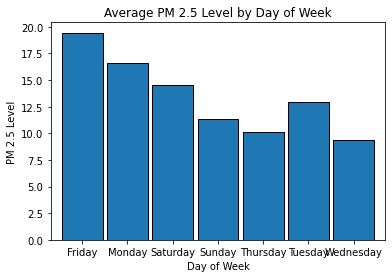

In [44]:
ax = df.Pm2_5.groupby(df.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average PM 2.5 Level by Day of Week', xlabel='Day of Week', ylabel='PM 2.5 Level')

[Text(0.5, 1.0, 'Average PM 10 Level by Day of Week'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'PM 10 Level')]

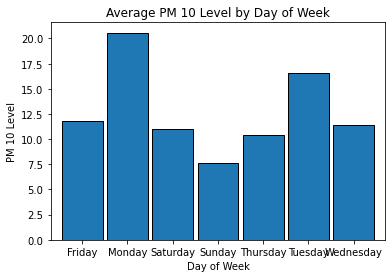

In [45]:
ax = df.Pm10.groupby(df.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average PM 10 Level by Day of Week', xlabel='Day of Week', ylabel='PM 10 Level')

[Text(0.5, 1.0, 'Average PM Carbon Monoxide Level by Day of Week'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'CO Level')]

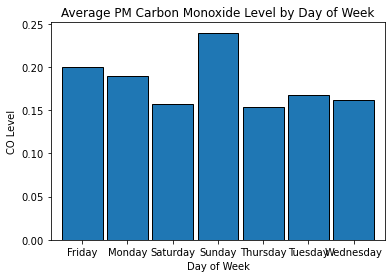

In [46]:
ax = df.CO.groupby(df.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average PM Carbon Monoxide Level by Day of Week', xlabel='Day of Week', ylabel='CO Level')